# Data Exploring Opioid Prescribing Rates at Federal Level - Analysis 

#### (Source: https://catalog.data.gov/dataset/opioid-prescribing-rates-at-va-facilities-2012-2018)


* This notebook analyzes which states have the highest and lowest opioid prescribing rate at Department of Veterans Affairs medical centers in 2016 and 2018 and if longitude is a factor that affects prescribing rates. This is more of a general high-level analysis for our data story.
* The dataset that I am using is opi_prescribing_rates_df_clean.csv from data.gov (source: https://catalog.data.gov/dataset/opioid-prescribing-rates-at-va-facilities-2012-2018) which is federal level data containing all the states, including CT.

## Setup

In [1]:
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely import wkt
import math
import seaborn as sns
import numpy as np

## Questions 1 & 2
Which states have the highest opioid prescribing rates at the federal level in 2012? What about in 2018?

### Steps and Code
1. Load the data from dataframe "opi_prescribing_rates_df_clean"

In [2]:
opi_prescribing_rates_df = pd.read_csv('../data/opi_prescribing_rates_df_clean.csv')

2. Group 2012 prescribing rates by state name and find the mean prescribing rate of each state

In [3]:
# Finding highest mean 2012 prescribing rate of states in dataset
state_frequency2012 = opi_prescribing_rates_df.groupby("state_full")["2012 Prescribing Rate"].mean()

3. Sort values in descending order 

In [4]:
state_frequency2012.sort_values(ascending=False).round(3)

state_full
Oklahoma                0.243
Nevada                  0.238
Oregon                  0.238
Arkansas                0.236
New Mexico              0.234
Indiana                 0.231
Idaho                   0.229
Washington              0.221
Utah                    0.221
Michigan                0.221
North Carolina          0.218
Tennessee               0.216
Georgia                 0.213
Kentucky                0.208
Arizona                 0.207
California              0.206
Montana                 0.196
Mississippi             0.192
Louisiana               0.188
Alabama                 0.186
Colorado                0.183
Texas                   0.183
West Virginia           0.181
Alaska                  0.174
Virginia                0.173
Kansas                  0.170
Ohio                    0.165
Wyoming                 0.163
Missouri                0.163
South Dakota            0.144
Illinois                0.135
Delaware                0.134
Wisconsin               0.131

4. Repeat steps 2-3 again for 2018 prescribing rate

In [5]:
# Finding highest mean 2018 prescribing rate of states in dataset
state_frequency2018 = opi_prescribing_rates_df.groupby("state_full")["2018 Prescribing Rate"].mean()
state_frequency2018.sort_values(ascending=False).round(3)

state_full
Idaho                   0.150
Oklahoma                0.133
New Mexico              0.131
Oregon                  0.130
Montana                 0.127
Washington              0.127
Nevada                  0.122
Colorado                0.118
Utah                    0.118
Kentucky                0.117
Louisiana               0.115
Alabama                 0.114
Indiana                 0.114
California              0.114
Arizona                 0.112
Georgia                 0.110
Arkansas                0.108
Michigan                0.106
Tennessee               0.106
North Carolina          0.103
West Virginia           0.100
Mississippi             0.093
Wyoming                 0.092
Kansas                  0.091
Virginia                0.089
Missouri                0.089
South Dakota            0.084
Illinois                0.083
Texas                   0.083
Wisconsin               0.082
Alaska                  0.081
Ohio                    0.079
Pennsylvania            0.077

### Answer
First, to clarify, the prescribing rate is the % of total prescriptions adminstered by statewide VA medical centers as per https://www.usatoday.com/story/news/politics/2018/01/11/va-publicly-releases-opiate-prescribing-rates-all-its-hospitals-first-time/1024895001/.

#### 2012 PRESCRIBING RATE
The top 5 states with the highest prescribing rates in 2012 are Oklahoma, Nevada, Oregon, Arkansas, and New Mexico in descending order. They were all above 23% of total prescriptions.

Connecticut was ranked 4th lowest with a 8.9% prescribing rate.

#### 2018 PRESCRIBING RATE
The top 5 states with the highest prescribing rates in 2018 are Idaho, Oklahoma, New Mexico, Oregon, and Montana in descending order. They were all above 12% of total prescriptions but far less than in 2012. 

Connecticut was ranked 8th lowest with a 6.5% prescribing rate.

### Oberservation/Interpretation
It seems like states in the Midwest/West have the highest opioid prescribing rates. Oklahoma, Oregon, and New Mexico are in the top 5 states for both 2012 and 2018. 

What is intriguing is that Connecticut's prescribing rate is consistently low. It is less than half of the highest prescribing rate for both years.

Furthermore, there is an apparent trend that prescribing rates have drastically lowered from 2012 to 2018. Oklahoma was the highest in 2012 at a 24.3% prescribing rate whereas in 2018, Idaho was the highest with just 15.0%.

## Question 3 & 4
Which states have the lowest opioid prescribing rates in 2012? What about in 2018?

### Steps & Code
1. Group 2012 prescribing rates by state name and find the mean prescribing rate of each state

In [6]:
# Finding lowest mean 2012 prescribing rate of states in dataset
state_lowest2012 = opi_prescribing_rates_df.groupby("state_full")["2012 Prescribing Rate"].mean()

2. Sort values ascending order

In [7]:
state_lowest2012.sort_values(ascending=True).head(5).round(3)

state_full
Puerto Rico      0.046
New Jersey       0.058
Phillipines      0.060
Connecticut      0.089
Massachusetts    0.093
Name: 2012 Prescribing Rate, dtype: float64

3. Repeat steps 1-2 again for 2018 prescribing rate

In [8]:
# Finding lowest mean 2018 prescribing rate of states in dataset
state_frequency2018 = opi_prescribing_rates_df.groupby("state_full")["2018 Prescribing Rate"].mean()
state_frequency2018.sort_values(ascending=True).head(5).round(3)

state_full
Puerto Rico             0.028
New Jersey              0.042
North Dakota            0.050
District of Columbia    0.056
Massachusetts           0.056
Name: 2018 Prescribing Rate, dtype: float64

### Answer

In 2012, the top 5 states/US territories with the lowest prescribing rates are Puerto Rico, New Jersey, Phillipines, Connecticut, and Massachusetts.

In 2018, the top 5 states/US territories with the lowest prescribing rates are Puerto Rico, New Jersey, North Dakota, District of Columbia, and Massachusetts.

### Observation/Interpretation
It is interesting that 3/5 states of the top 5 that have the lowest prescribing rates in both 2012 and 2018 are on the East Coast. 

This is in contrast with the states who have the highest prescribing rates - most of them are more West. 

With that said, I am curious about my first observation with Questions 1 & 2. Does longitude have any relationship with prescribing rates? My hypothesis is that as we go further West, the prescribing rate increases.

## Question 5 & 6
Does longitude have an effect on opioid prescribing rates in 2012? What about in 2018?

### Steps & Code
1. Create a regression plot with x as longitude and y as 2012 prescribing rate. 

(We are only looking for continguous US so we are dropping Alaska, Hawaii, Philippines, and Puerto Rico from the dataset. Decimals are rounded to the thousandths.)

<AxesSubplot:xlabel='longitude', ylabel='2012 Prescribing Rate'>

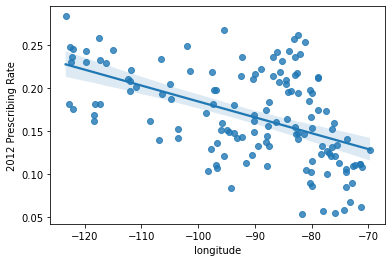

In [9]:
#2012 prescribing rate
prate_2012_lng = opi_prescribing_rates_df[["state_full", "2012 Prescribing Rate", "longitude"]]
prate_2012_lng = prate_2012_lng.set_index("state_full")
prate_2012_lng.head(5).round(3)

# can create a list of state names to drop
states_to_drop = ['Alaska', 'Hawaii', 'Phillipines', 'Puerto Rico']

prate_2012_lng=prate_2012_lng.drop(index=states_to_drop)

# regression
sns.regplot(x="longitude", y="2012 Prescribing Rate", data = prate_2012_lng)

2. Apply correlation to both x and y variables declared above to see strength of relationship

In [10]:
prate_2012_lng[['longitude', '2012 Prescribing Rate']].corr().round(3)

,longitude,2012 Prescribing Rate
longitude,1.000,-0.508
2012 Prescribing Rate,-0.508,1.000


3. Create a scatterplot with hue to identify various states

(Remember to filter out Philippines, Alaska, Hawaii, and Puerto Rico)

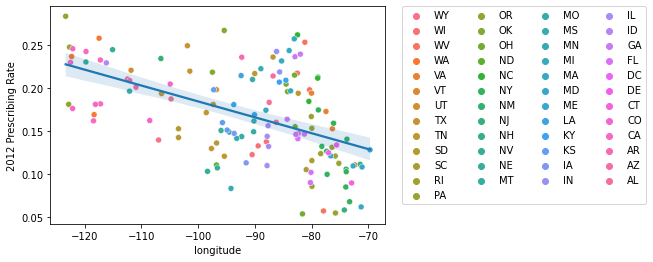

In [11]:
# filtering out Phillipines, Alaska, Hawaii, PR as longitude outliers
state_list = ["Phillipines", "Alaska", "Hawaii", "Puerto Rico"]
noncontinental_filter = opi_prescribing_rates_df["state_full"].isin(state_list)
opi_prescribing_rates_US = opi_prescribing_rates_df[-noncontinental_filter]

# creating scatterplot of 2012 prescribing rate
splot = sns.scatterplot(x="longitude", y="2012 Prescribing Rate", 
            hue='state_postal',
            data = opi_prescribing_rates_US,
            )

sns.regplot(x="longitude", y="2012 Prescribing Rate", 
            data = opi_prescribing_rates_US, scatter=False)

plt.legend(bbox_to_anchor=(1.05, 1), 
           loc='upper left', borderaxespad=0, ncol=4)

4. Repeat steps 1-3 with y as 2018 prescribing rate

In [12]:
#2018 prescribing rate
prate_2018_lng = opi_prescribing_rates_df[["state_full", "2018 Prescribing Rate", "longitude"]]
prate_2018_lng = prate_2018_lng.set_index("state_full")

In [13]:
prate_2018_lng.head(5).round(3)

,2018 Prescribing Rate,longitude
state_full,,
Wyoming,0.084,-106.985
Wyoming,0.101,-104.790
Wisconsin,0.088,-87.976
Wisconsin,0.068,-90.494
Wisconsin,0.090,-89.431


In [14]:
prate_2018_lng=prate_2018_lng.drop(states_to_drop)

,longitude,2018 Prescribing Rate
longitude,1.000,-0.496
2018 Prescribing Rate,-0.496,1.000


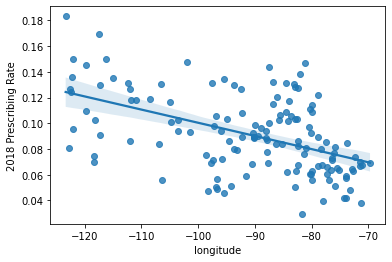

In [15]:
sns.regplot(x="longitude", y="2018 Prescribing Rate", data = prate_2018_lng)
prate_2018_lng[['longitude', '2018 Prescribing Rate']].corr().round(3)

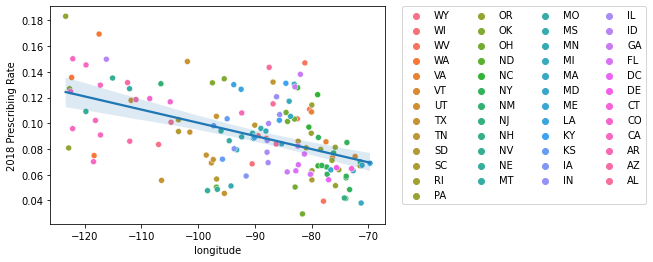

In [16]:
# creating scatterplot of 2018 prescribing rate
splot = sns.scatterplot(x="longitude", y="2018 Prescribing Rate", 
            hue='state_postal',
            data = opi_prescribing_rates_US,
            )

sns.regplot(x="longitude", y="2018 Prescribing Rate", 
            data = opi_prescribing_rates_US, scatter=False)

plt.legend(bbox_to_anchor=(1.05, 1), 
           loc='upper left', borderaxespad=0, ncol=4)

### Answer
There seems to be a moderate negative relationship between longitude and 2012 opioid prescribing rates because the correlation is -0.508. There is also a moderate negative relationship between longitude and 2018 opioid prescribing rates with a correlation of -0.496.

The correlation for the latter is slightly lower in absolute value than the former which means the relationship is slightly weaker.

### Observation/Interpretation
These results mean that as one moves further East, the prescribing rate decreases. In other words, as one moves further West, the prescribing rate increases. This latter statement matches my hypothesis from the first question. 

I am curious about any underlying reasons for this moderately strong trend. Some reasons I have thought of are more relaxed opioid prescription laws and the increased proportion of rural areas relative to urban areas in the West. 

I also want to plot the observations using geopandas to show a geographical representation of my observations.

### Additional Visualizations of Relationship Between Longitude and Prescribing Rates (Using US Map)

#### 1. Using longitude and latitude for x and y on a scatter plot

* Plot each row (medical center) using the `longitude` and `latitude` columns for X and Y position and color the point using the `2018 Prescribing Rate' column

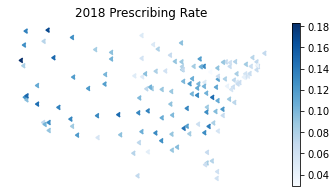

In [17]:
opi_prescribing_rates_US.plot(kind='scatter',
                              x='longitude', 
                              y='latitude',
                              color=opi_prescribing_rates_US['2018 Prescribing Rate'],
                              cmap='Blues',
                              figsize=(6,3),
                              marker=4
                             )
plt.axis('off')
plt.title('2018 Prescribing Rate')
plt.show()



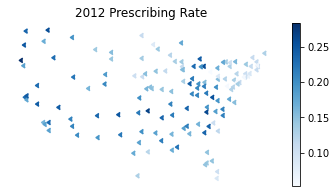

In [18]:
opi_prescribing_rates_US.plot(kind='scatter',
                              x='longitude', 
                              y='latitude',
                              color=opi_prescribing_rates_US['2012 Prescribing Rate'],
                              cmap='Blues',
                              figsize=(6,3),
                              marker=4
                             )
plt.axis('off')
plt.title('2012 Prescribing Rate')
plt.show()

#### 2. Use `geopandas` and a US State Map

1. First we can load in a state map and then overplot the plots as above

In [19]:
# load GeoJSON file with outlines of states
us_map_gdf = gpd.read_file('../data/us_states.geojson')

<AxesSubplot:>

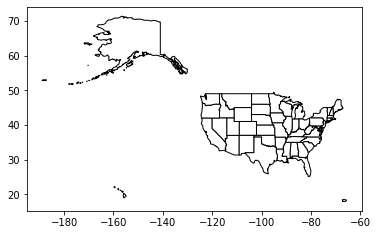

In [20]:
us_map_gdf.plot(color='white', edgecolor='black')

<AxesSubplot:>

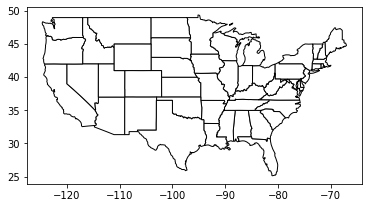

In [21]:
# drop the outlier states from above

# make row filter
drop_states_filter = us_map_gdf['name'].isin(states_to_drop)

# subset rows removing unwanted states
us_map_mainstates_gdf = us_map_gdf[-drop_states_filter]

us_map_mainstates_gdf.plot(color='white', edgecolor='black')

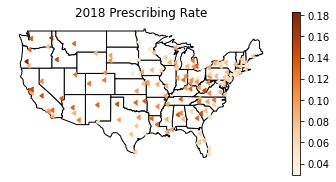

In [22]:
base = us_map_mainstates_gdf.plot(color='white', edgecolor='black')

opi_prescribing_rates_US.plot(kind='scatter',
                              x='longitude', 
                              y='latitude',
                              color=opi_prescribing_rates_US['2018 Prescribing Rate'],
                              cmap='Oranges',
                              figsize=(6,3),
                              marker=4,
                              ax=base
                             )
plt.axis('off')
plt.title('2018 Prescribing Rate')
plt.show()

2. Create a `GeoDataFrame` from the `Pandas` data frame

* STEPS
  1. translate the `point` string column to a geometry colum
  2. create a new `GeoDataFrame` from `opi_prescribing_rates_US`

In [23]:
geom=opi_prescribing_rates_US['point'].apply(wkt.loads)

opi_prates_US_gdf = gpd.GeoDataFrame(opi_prescribing_rates_US,
                 geometry=geom)
opi_prates_US_gdf=opi_prates_US_gdf.set_crs('EPSG:4326')

* Plotting points using `GeoPandas`

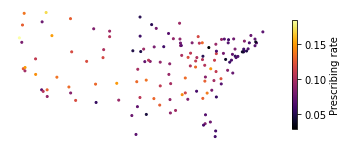

In [24]:
opi_prates_US_gdf.plot(column='2018 Prescribing Rate',
                        legend=True,
                        legend_kwds={'shrink': 0.5,
                                     'label': 'Prescribing rate'
                                    },
                        markersize=4,
                        cmap='inferno'
                      )

plt.axis('off')
plt.show()

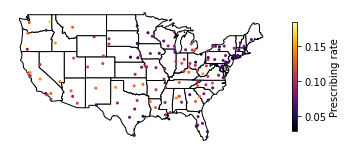

In [25]:
base = us_map_mainstates_gdf.plot(color='white', edgecolor='black')
opi_prates_US_gdf.plot(column='2018 Prescribing Rate',
                        legend=True,
                        legend_kwds={'shrink': 0.5,
                                     'label': 'Prescribing rate'
                                    },
                        markersize=4,
                        cmap='inferno',
                       ax=base
                      )

plt.axis('off')
plt.show()

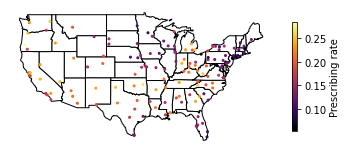

In [26]:
base = us_map_mainstates_gdf.plot(color='white', edgecolor='black')
opi_prates_US_gdf.plot(column='2012 Prescribing Rate',
                        legend=True,
                        legend_kwds={'shrink': 0.5,
                                     'label': 'Prescribing rate'
                                    },
                        markersize=4,
                        cmap='inferno',
                       ax=base
                      )

plt.axis('off')
plt.show()

In the above plots, I can see that there is a cluster of dark purple in the Northeast which means that those medical centers have lower opioid prescribing rates. There are many points on the West Coast and South that are orange and yellow which mean higher opioid prescribing rates. 

#### 3. State Averages

* Use `groupby` on `state_full` to get the mean prescribing rates for each state

In [27]:
cols_to_use = ['2012 Prescribing Rate',
               '2018 Prescribing Rate',
               '2012 to 2018 Rate Difference'
              ]

opi_prates_bystate=opi_prescribing_rates_US.groupby('state_full')[cols_to_use].mean()

In [28]:
# Merging into US state map
us_prates_gdf=us_map_mainstates_gdf.merge(opi_prates_bystate,
                            left_on='name',
                            right_index=True
                           )

us_prates_gdf.head()

,id,name,density,geometry,2012 Prescribing Rate,2018 Prescribing Rate,2012 to 2018 Rate Difference
0,01,Alabama,94.65,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",0.185838,0.114137,-0.071701
2,04,Arizona,57.05,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",0.206743,0.112044,-0.094699
3,05,Arkansas,56.43,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",0.235962,0.108011,-0.127951
4,06,California,241.70,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",0.206487,0.113604,-0.092883
5,08,Colorado,49.33,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",0.183462,0.117924,-0.065538


* Plot the map using the column of interest to color each state shape by state average

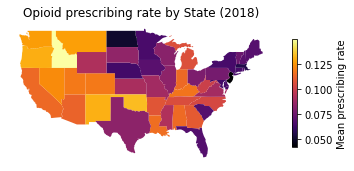

In [29]:
us_prates_gdf.plot(column='2018 Prescribing Rate',
                    legend=True,
                        legend_kwds={'shrink': 0.5,
                                     'label': 'Mean prescribing rate'
                                    },
                   cmap='inferno'
                  )

plt.title('Opioid prescribing rate by State (2018)')
plt.axis('off')
plt.show()

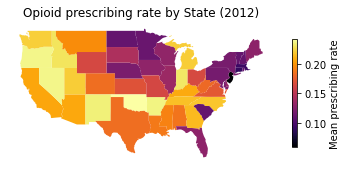

In [30]:
us_prates_gdf.plot(column='2012 Prescribing Rate',
                    legend=True,
                        legend_kwds={'shrink': 0.5,
                                     'label': 'Mean prescribing rate'
                                    },
                   cmap='inferno'
                  )

plt.title('Opioid prescribing rate by State (2012)')
plt.axis('off')
plt.show()

I noticed in both the 2012 and 2018 visualizations that the states in the West and South are lighter in color (high mean opioid prescribing rates) than the Midwest and Northeast which verge into dark purple. 

Unfortunately the color scale for both plots are slightly different (e.g. 0.125 begins yellow for 2018 while 0.20 begins yellow for 2012) so they are not comparable to each other but they still give a good picture of what the overall trend looks like. 

Nevertheless, it is clear that longitude and prescribing rates are related: As you move further West, the mean prescribing rates get higher and the map shows that with lighter state colors.